#### 머신러닝 맛보기 - K-최근접이웃 모델
- 머신러닝 최초 가장 기본으로 사용하기 좋음 (실전에는 사용안하는 추세, 너무 기본 모델)

In [1]:
### 머신러닝 라이브러리 설치 확인

from sklearn.neighbors import KNeighborsClassifier

### 시각화 라이브러리
import matplotlib.pyplot as plt

# - 한글처리
plt.rc("font", family="NanumGothic")

# 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False 

##### 생선데이터를 이용하여 어떤 생선인지 분류하기(분류분석)
- 생선 종류 : 도미와 빙어
- 사용 데이터 : 각 생선에 대한 무게와 길이 데이터
- 분류 : 생선의 무게와 길이를 이용하여 생선의 종류 분류하기

In [2]:
### 도미의 길이(cm)와 무게(g) 데이터
# - 단위는 확인필요 (단위 모를 경우 값의 크기나 범위 확인)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                            30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                            33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                            35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                            39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                            390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                            600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                            685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                            850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
### 사용할 데이터의 길이가 같은지 확인 필요
len(bream_length), len(bream_weight)

(35, 35)

In [4]:
### 빙어의 길이(cm)와 무게(g) 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 데이터 분포(산점도) 시각화하기

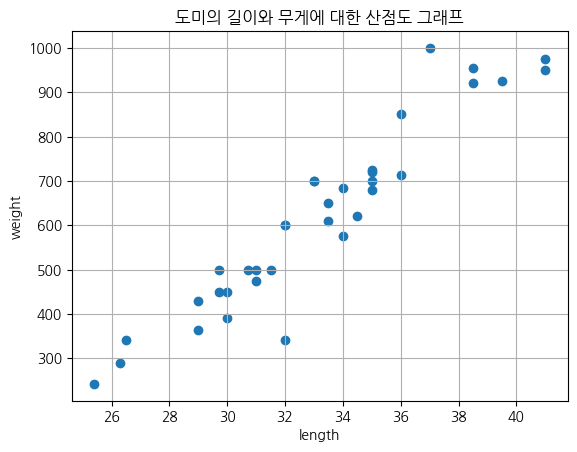

In [5]:
### 도미 데이터를 이용해서 산점도 그래프 그리기
plt.title("도미의 길이와 무게에 대한 산점도 그래프")
plt.scatter(bream_length, bream_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.grid()
plt.show()

In [6]:
### 해석
# - 길이(x축)가 커질수록 무게(y축)가 커지는 데이터를 가지고 있음
#  (비례해서 값이 증가되고 있음)
# - 산점도의 분포는 우상향(+)의 선형(직선) 분포를 나타내고 있음
# - 길이와 무게의 관계를 볼 때, 양(+)의 상관관계를 나타내고 있음
#  (양의 상관관계는 우상향, 음의 상관관계는 우하향 분포를 나타냄)

##### <산점도의 형태에 따라서 분석 방법 선택>
- 선형(직선 또는 곡선 포함) 형태인 경우
    - 일반적으로 회귀분석 방법을 사용(분류 분석도 가능)
    - 선형이면서 연속적 값을 예측하는 경우에는 --> 회귀분석 모델 사용
    - 선형이면서 판단을 하는 경우 -> 분류분석 모델 사용
    - 선형이면서 판단을 하는 경우에는 분류 기준이 되는 범주형 데이터가 포함되어 있어야 함
- 선형 형태가 아닌 경우
    - 분류 분석 방법 중 -> 분류분석 모델 또는 군집분석 모델을 사용

##### <분석 방법>
- 1. 회귀분석
    - 지도학습 회귀분석모델 사용 : 정답을 알고 있는 경우 사용
    - 정답의 형태 : 연속형 데이터
    - 예측의 의미 : 정답을 예측하는 것으로, 연속형 데이터를 추정하는 것
- 2. 분류분석
    - 2-1. 분류분석
        - 지도학습 분류분석모델 사용 : 정답을 알고 있는 경우 사용
        - 정답의 형태 : 범주형 데이터
        - 판단(분류)의 의미 : 정답을 판단하는 것으로 범주형 데이터를 분류하는 것
    - 2-1. 군집분석
        - 비지도 학습 군집분석모델 사용 : 정답을 모르는 상태에서 사용
        - 군집의 의미 : 데이터의 임의 특성을 기준으로 군집(클러스트, 그룹)을 만드는 것
            - 어느 그룹에 속하는지를 판단하는 것 (범주형 데이터를 분류하는 의미)

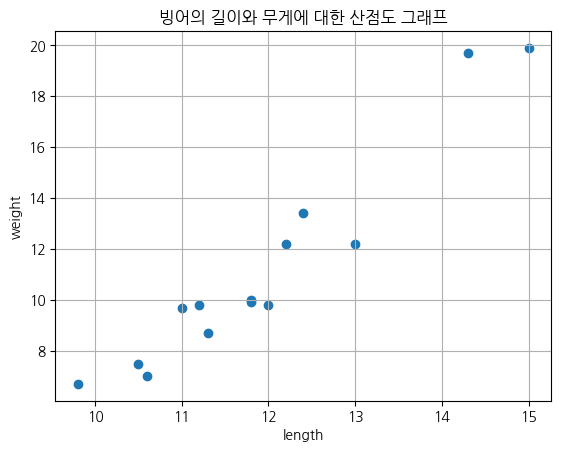

In [7]:
### 빙어의 무게와 길이 데이터 산점도 그리기
### 도미 데이터를 이용해서 산점도 그래프 그리기
plt.title("빙어의 길이와 무게에 대한 산점도 그래프")
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.grid()
plt.show()

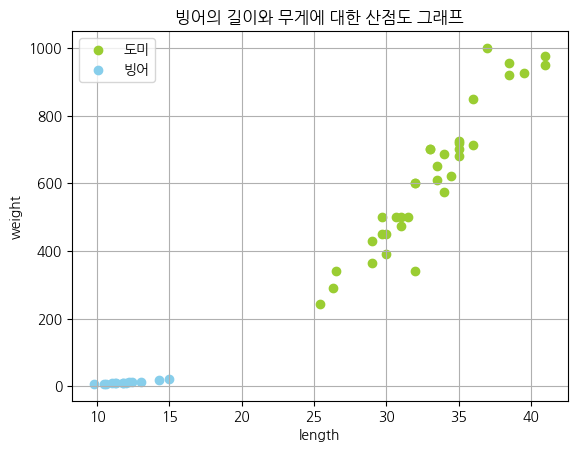

In [8]:
### 하나의 그래프에 도미와 빙어 산점도를 모두 시각화
# - 색상 : 도미는 연두, 빙어는 하늘
plt.title("빙어의 길이와 무게에 대한 산점도 그래프")
plt.scatter(bream_length, bream_weight, color="yellowgreen", label ="도미")
plt.scatter(smelt_length, smelt_weight, color="skyblue", label ="빙어")
plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.grid()
plt.show()

#### 분류를 위한 데이터 전처리 및 가공

##### 1. 데이터 특성에 맞게 합치기
- 훈련(학습)을 시키기 위한 데이터 형태로 만들기
    - 문제 데이터 : [ [길이, 무게], [길이, 무게] ... ]
        - 문제 데이터를 [독립변수, X] 라고 칭함
        - 독립변수(x)는 2차원 형태를 갖추어야 함
        - 머신러닝 필수사항

    - 정답 데이터 : [ 도미, 도미, 도미, .... 빙어, 빙어 ... ]
        - 정답 데이터를 [종속변수, y] 라고 칭함
        - 종속변수(y)는 1차원 형태를 갖추어야 함
        - 머신러닝 & 딥러닝 필수사항
        - 분류 기준에서의 종속변수 형태
            - 둘중 하나를 분류할 때 > "이진분류" 0 또는 1중에 분류
            - 세개 이상 중에 하나를 분류할 때 > "다중분류" 0, 1, 2 ... n 중에 분류

- 훈련(학습)에 사용되는 모든 특성의 데이터는 숫자값을 사용
    - 범주형 데이터가 문자인 경우에는 숫자(0~n까지)로 사용
    - 이때 원-핫인코딩을 이용하는 경우도 있음
    - 주로 직접 숫자로 변환하는 코드를 작성하여 변환

- 분석 용어
    - 각 데이터(도미, 빙어)를 "특성" 이라고 칭함
    - 특성 => 컬럼, 항목, 퓨처(딥러닝), ... 모두 같은 의미

In [9]:
### 도미와 빙어의 길이 데이터 합치기
# - 길이 변수명 : length

length = bream_length + smelt_length

len(length)

49

In [10]:
### 도미와 빙어의 무게 데이터 합치기
# - 길이 변수명 : weight

weight = bream_weight + smelt_weight

len(weight)

49

#### 독립변수 가공하기

In [11]:
### 길이와 무게 데이터를 이용해서 2차원 독립변수 만들기
# - [ [길이, 무게], [길이, 무게] ... ] : 49행 2열의 형태
# 변수명 : fish_data

fish_data = [[l, w] for l , w in zip(length, weight)]

fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [12]:
### 종속변수 생성하기
# - 수집된 데이터 내에 독립변수 이외에 종속변수가 있다면, 그대로 사용
# -> 없다면, 만들어 내야 함 (단, 종속변수의 값을 정확히 알고 있는 경우에만)
# - 독립변수의 각 인덱스 위치에 해당하는 종속변수 값을 만들어 내야 함
# - 1차원으로 생성
# - 도미는 1, 빙어는 0으로 데이터 값 사용
# - 변수명 : fish_target

len(bream_length), len(smelt_length)
fish_target = [1] * 35 + [0] * 14

len(fish_target), fish_target

(49,
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0])

#### 훈련(학습) 시키기
- 훈련에 사용할 훈련(학습) 모델
    - 모델 라이브러리 : KNeighborsClassifier
    - 모델 패키지 : sklearn.neighbors
    - 모델 이름 : KNN (K-Nearest Neighbors : K-최근접 이웃 "알고리즘"을 사용하는 "모델")
    - KNN은 머신러닝 모델 중에 가장 간단한 모델
    - 타 모델들과 비교용으로 주로 사용됨

- 처리 방식
    - 분류(판단, 예측) 하고자 하는 특성값들과 가장 가까운 이웃의 값들과 거리 비교
    - 가장 가까운 곳의 갯수(이웃들의 갯수)를 기준으로 비율(확률) 대비 판단
    - 비율이 가장 높은 쪽으로 판단 (다수결의 원칙을 따름)

- 훈련(학습) 순서
    - 1. 데이터 수집
    - 2. 데이터 전처라
    - 3. 데이터 가공
        - 독립변수, 종속변수 생성
        - 훈련 데이터, 테스트 데이터로 분류 또는 훈련, 검증, 테스트 데이터로 분류
    - 4. 훈련모델 생성
    - 5. 훈련 시키기
        - 훈련 데이터 사용
    - 6. 훈련모델 정확도 검증
        - 테스트 데이터 사용 또는 검증 데이터 사용
        - 훈련 정확도 및 테스트(검증) 정확도 확인 후 비교
        - 6-1. 튜닝
        - 6-2. 성능평가
    - 7. 예측하기(임의 데이터로 정답 잘 맞추는지 검증)
        - 임의 데이터, 즉 테스트 데이터를 의미
        - 7-1. 최종 정확도 검증(테스트 정확도 검증)
        - 7-2. 성능평가

In [13]:
### 사용할 모델 정의
from sklearn.neighbors import KNeighborsClassifier

In [14]:
### 1. 훈련(학습) 모델 생성하기 (클래스)
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [15]:
### 2. 훈련(학습) 시키기
# - 지도학습 훈련 함수 : fit(독립변수, 종속변수)
# - 비지도학습 훈련 함수 : fit(독립변수)
# - 훈련 시킨 모델을 훈련모델이라고 칭함
# - 데이터가 많을수록 훈련 시키는 시간은 길어짐(PC 성능에 따름)
# - fit에 넣어서 사용하는 독립변수와 종속변수를 "훈련 데이터" 라고 함
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [16]:
### 3. 훈련 정확도 확인하기
# - 훈련 데이터와 임의 데이터(검증 또는 테스트 데이터)로 정확도 확인
# - score()에 넣어서 사용하는 데이터중에 훈련 데이터를 넣어서 확인하는 경우를 훈련 정확도 라고 함
# - 검증 또는 테스트 데이터를 넣어서 확인하는 경우를 검증 정확도 또는 테스트 정확도라고 칭함
# - score() 결과값 : 0~1 (0% ~ 100%)... 1에 가까울수록 정확도 높음
kn.score(fish_data, fish_target) # 결과값이 1이므로 훈련 정확도는 100%를 나타냄

# - (학계)에서는 훈련 정확도가 100%일 경우 사용할 수 없는 모델로 판단함
# 확률은 99.999%까지 인정되며, 100%는 인정되지 않음

1.0

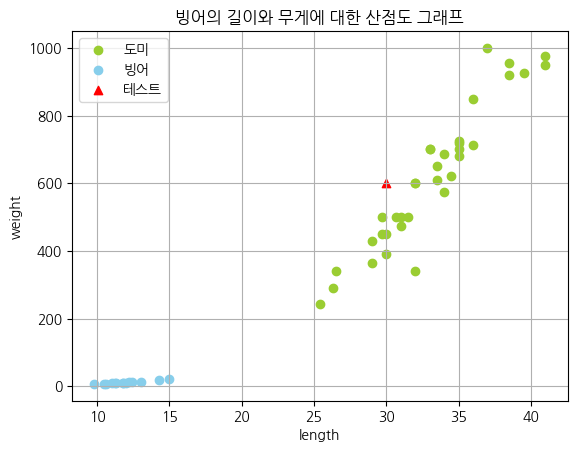

In [17]:
### 4. 예측하기
# - 예측에 사용할 임의 데이터 : 길이 30cm, 무게 600(g)
### 산점도를 이용해서 예측 데이터의 위치 확인해보기
# - 추가로 예측 데이터도 산점도로 표시 (색상은 빨강)

plt.title("빙어의 길이와 무게에 대한 산점도 그래프")
plt.scatter(bream_length, bream_weight, color="yellowgreen", label ="도미")
plt.scatter(smelt_length, smelt_weight, color="skyblue", label ="빙어")

### 예측하고자 하는 특성 표시
plt.scatter(30, 600, color="red", marker="^", label ="테스트")

plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.grid()
plt.show()

In [18]:
### 예측 함수 사용
# - 예측 함수 : predict([[예측할 독립변수]])
# - 2차원 데이터(독립변수와 동일한 차원)로 만들어서 넣어야 함
kn.predict([[30, 600]])

# 1은 도미, 0은 빙어 -> 종속변수 생성 시 규칙(범주값)을 따름

array([1])

#### 하이퍼 파라미터 사용하기
- 하이퍼 파라미터 의미
    - 사람이 직접 성능을 높이기 위해 특정 파라미터의 값을 수정해 주어야하는 것을 의미
    - 훈련 모델의 성능(정확도)에 영향을 미치는 파라미터를 "하이퍼 파라미터"라고 칭함
    - 하이퍼 파라미터의 값을 변경(튜닝)하면서 성능을 향상 시킬 수 있음

- 하이퍼 파라미터 튜닝
    - 성능을 높이기 위해 파라미터의 값을 바꿔가면서 훈련검증을 하는 방식을 의미

- KNN 에서 사용하는 하이퍼 파라미터
    - n_neighbors : 이웃의 갯수를 변경하면서 성능을 개선할 수 있음 (기본값 = 5)
    - 모델 생성시에 속성으로 넣어줌

In [19]:
### 훈련모델 생성하기
# - 이웃의 갯수 : 20개
kn20 = KNeighborsClassifier(n_neighbors=20)

kn20

KNeighborsClassifier(n_neighbors=20)

In [20]:
### 훈련 시키기
kn20.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=20)

In [21]:
### 훈련 정확도 확인하기
# - score() 함수 처리 순서
# - 자체적으로 predict() 수행 후 predict() 결과와 fish_target의 결과를 비교하여 정확도 확인
train_score = kn20.score(fish_data, fish_target)
round(train_score, 3)

### 분석에서 문서화 시 사용하는 소숫점 자리수는 3자리까지 표현

0.98

#### 하이퍼 파라미터 튜닝
- 훈련 정확도가 1이 아닌 가장 높은 정확도를 나타낼 때
    -> 이웃의 갯수를 알아내면 가장 좋은 파라미터값을 선정할 수 있음

In [22]:
### 이웃의 갯수 기본값으로 모델 생성
kn = KNeighborsClassifier()

kn

KNeighborsClassifier()

In [23]:
### 훈련 시키기
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [24]:
### 훈련 정확도 확인하기
train_score = kn.score(fish_data, fish_target)

train_score

1.0

In [25]:
### 이웃의 갯수 하이퍼 파라미터 값 변경(튜닝) 하기
# - 이웃의 갯수는 홀수로 설정해야 다수결이 만들어짐
kn.n_neighbors = 25
train_score = kn.score(fish_data, fish_target)
train_score

0.9795918367346939

In [26]:
### 훈련 정확도가 1이 아닌 가장 높은 정확도 일 때 이웃의 갯수 찾기

best_train_score = 0  # 가장 높은 훈련 정확도를 추적할 변수
best_n_neighbors = 0  # 해당 정확도에 대응하는 이웃의 갯수

for idx in range(3, len(fish_data), 2):
    kn.n_neighbors = idx
    train_score = kn.score(fish_data, fish_target)
    
    # 훈련 정확도가 1보다 작고, 현재 정확도가 이전의 가장 높은 정확도보다 높은 경우
    if train_score < 1 and train_score > best_train_score :
        best_train_score = train_score
        best_n_neighbors = idx

print(f"가장 높은 훈련 정확도: {best_train_score :.3f}, 이웃의 갯수: {best_n_neighbors}")


가장 높은 훈련 정확도: 0.980, 이웃의 갯수: 19
